In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import os 
import h5py
import sys
%matplotlib inline 

In [2]:
model_name = "LinearRegression.h5py"

In [3]:
# os.chdir('./../../../../../data/hongtao')
be = h5py.File('./../../../../../data/hongtao/variables_tt_re.h5','r')
bmu = h5py.File('./../../../../../data/hongtao/variables_tt_rmu.h5','r')
be1 = h5py.File('./../../../../../data/hongtao/variables_tt_re1.h5','r')
print(be.keys())
print('')
print(be1.keys())
dataset = be1

<KeysViewHDF5 ['j1_eta', 'j1_isbtag', 'j1_m', 'j1_phi', 'j1_pt', 'j2_eta', 'j2_isbtag', 'j2_m', 'j2_phi', 'j2_pt', 'j3_eta', 'j3_isbtag', 'j3_m', 'j3_phi', 'j3_pt', 'j4_eta', 'j4_isbtag', 'j4_m', 'j4_phi', 'j4_pt', 'j5_eta', 'j5_isbtag', 'j5_m', 'j5_phi', 'j5_pt', 'j6_eta', 'j6_isbtag', 'j6_m', 'j6_phi', 'j6_pt', 'j7_eta', 'j7_isbtag', 'j7_m', 'j7_phi', 'j7_pt', 'j8_eta', 'j8_isbtag', 'j8_m', 'j8_phi', 'j8_pt', 'lep_eta', 'lep_m', 'lep_phi', 'lep_pt', 'met_met', 'met_phi', 'mttReco', 'mttTrue']>

<KeysViewHDF5 ['bh_eta', 'bh_phi', 'bh_pt', 'bl_eta', 'bl_phi', 'bl_pt', 'j1_DL1r', 'j1_eta', 'j1_isbtag', 'j1_m', 'j1_phi', 'j1_pt', 'j2_DL1r', 'j2_eta', 'j2_isbtag', 'j2_m', 'j2_phi', 'j2_pt', 'j3_DL1r', 'j3_eta', 'j3_isbtag', 'j3_m', 'j3_phi', 'j3_pt', 'j4_DL1r', 'j4_eta', 'j4_isbtag', 'j4_m', 'j4_phi', 'j4_pt', 'j5_DL1r', 'j5_eta', 'j5_isbtag', 'j5_m', 'j5_phi', 'j5_pt', 'j6_DL1r', 'j6_eta', 'j6_isbtag', 'j6_m', 'j6_phi', 'j6_pt', 'j7_DL1r', 'j7_eta', 'j7_isbtag', 'j7_m', 'j7_phi', 'j7_pt'

In [4]:
input_keys = ['j1_pt', 'j1_eta', 'j1_phi', 'j1_m', 'j1_DL1r', 'j2_pt', 'j2_eta', 'j2_phi', 'j2_m', 'j2_DL1r', 'j3_pt', 'j3_eta', 'j3_phi', 'j3_m', 'j3_DL1r', 'j4_pt', 'j4_eta', 'j4_phi', 'j4_m', 'j4_DL1r', 'j5_pt', 'j5_eta', 'j5_phi', 'j5_m', 'j5_DL1r', 'j6_pt', 'j6_eta', 'j6_phi', 'j6_m', 'j6_DL1r', 'j7_pt', 'j7_eta', 'j7_phi','j7_m', 'j7_DL1r', 'j8_pt', 'j8_eta', 'j8_phi','j8_m', 'j8_DL1r', 'lep_pt', 'lep_eta', 'lep_phi', 'lep_m', 'met_met', 'met_phi'] 
output_keys = ['th_pt', 'th_eta','th_phi', 'tl_pt', 'tl_eta', 'tl_phi']
# output_keys = ['th_eta','th_phi', 'tl_eta', 'tl_phi']

output_length = len(output_keys)

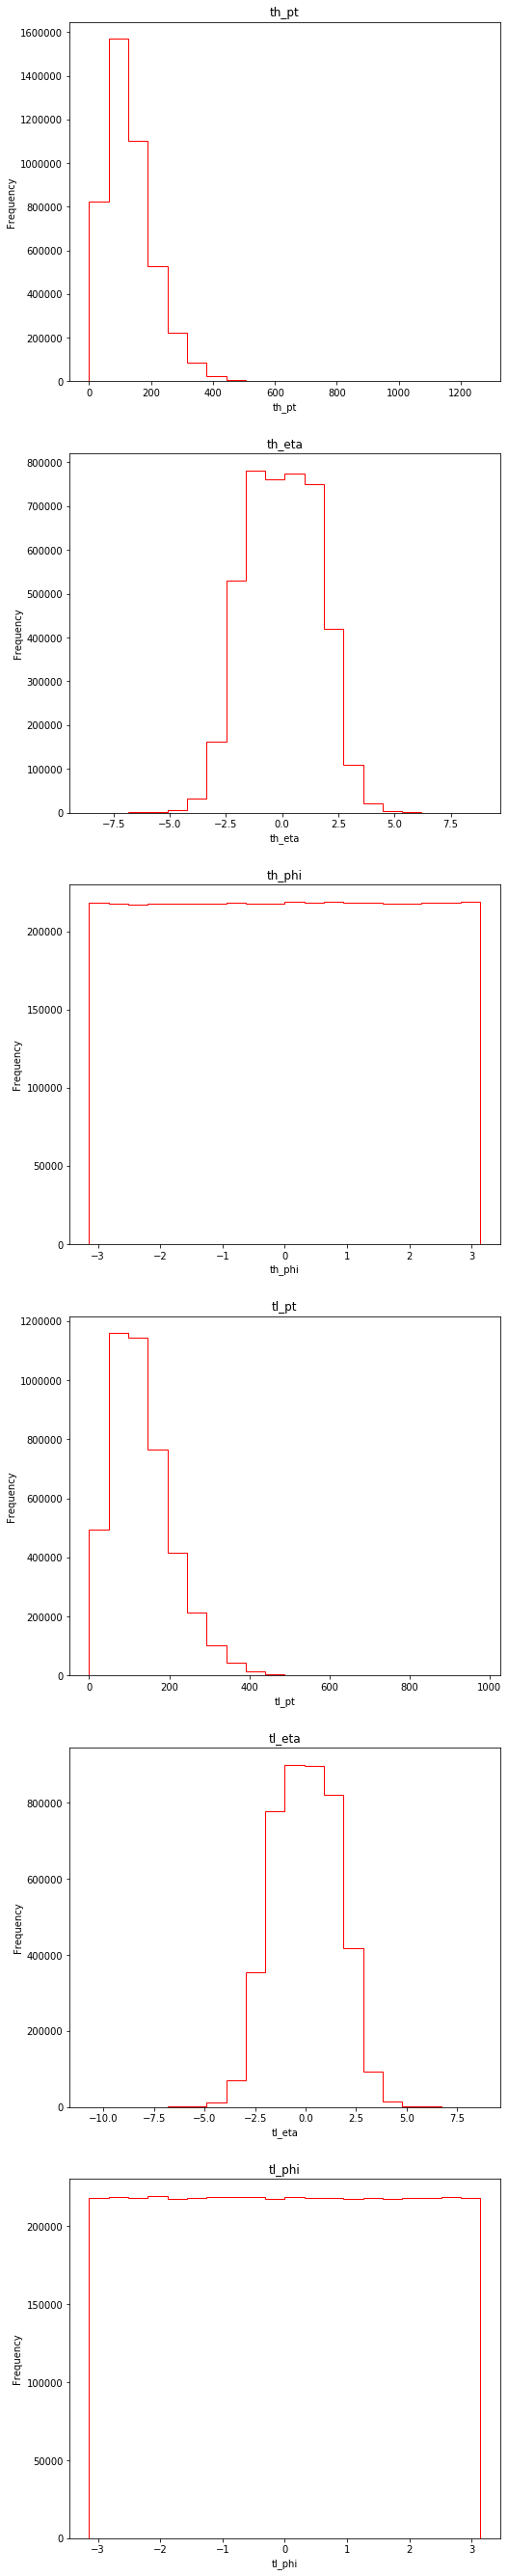

In [5]:
# Original variables

plt.figure(figsize=(8,8*output_length))
for i in range(0, output_length):
    plt.subplot(output_length,1,i+1)
    plt.hist(dataset.get(output_keys[i]), 20, histtype = 'step', color='r')
    plt.xlabel(output_keys[i])
    plt.ylabel('Frequency')
    plt.title(output_keys[i])

In [6]:
# Convert into numpy arrays and mean normalize
crop =  100000

input_arrays = []
output_arrays = [] 
in_std = []
in_mean = []
out_std = []
out_mean = []

# for key in input_keys:
#     exec(key + ' = np.array(dataset.get(key))[0:crop].reshape((1,-1))')
#     exec('{0} = ({0} - np.mean({0}))/np.std({0})'.format(key))
#     exec('input_arrays.append({0})'.format(key))

    
def convert_normalize(keys, std, mean, total):
    for x in keys:
        var = np.array(dataset.get(x))[0:crop].reshape((1,-1))
        sig = np.std(var)
        mu = np.mean(var)
        std.append(sig)
        mean.append(mu)
        var = (var - mu)/sig 
        total.append(var)

    
convert_normalize(input_keys, in_std, in_mean, input_arrays)
convert_normalize(output_keys, out_std, out_mean, output_arrays)

out_std = np.array(out_std).reshape((1,-1))
out_mean = np.array(out_mean).reshape((1,-1))
in_std = np.array(in_std).reshape((1,-1))
in_mean = np.array(in_mean).reshape((1,-1))

In [7]:
# Create input and test array
split = int(np.floor(0.8*crop)) # 80/20 split 
shuffle = True
    
total_input = np.stack(input_arrays).reshape((crop, len(input_keys)))
total_output = np.stack(output_arrays).reshape((crop, len(output_keys)))

if shuffle:
    rng_state = np.random.get_state()
    np.random.shuffle(total_input)
    np.random.set_state(rng_state)
    np.random.shuffle(total_output)
    
# size = total_input.shape
# total_input = np.array(np.random.normal(size=total_input.shape))

train_input, test_input = total_input[0:split, :], total_input[split:, :]
train_output, test_output = total_output[0:split,:], total_output[split:,:]

In [8]:
print(train_input.shape, train_output.shape)
print(test_input.shape, test_output.shape)

(80000, 46) (80000, 6)
(20000, 46) (20000, 6)


In [9]:
# Build model

# optimizer = keras.optimizers.RMSprop(learning_rate = 1e-5)
optimizer = keras.optimizers.Adam(learning_rate=1e-6)
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)


def build_model():
    model = keras.Sequential([
        layers.Dense(len(output_keys),  input_shape=[len(input_keys)], activation='linear')
    ])
    
    model.compile(loss='mse', optimizer= optimizer, metrics=['mse'])
    return model 

# def build_model():
#     model = keras.Sequential([
#         layers.Dense(6, activation='linear', 
#                      input_shape=[len(input_keys)])])
    
#     model.compile(loss='mse', optimizer= optimizer, metrics=['mse'])
    
#     return model 
    

In [10]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 282       
Total params: 282
Trainable params: 282
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Fit model

Epochs= 4096

history = model.fit(train_input, train_output, verbose=1, epochs=Epochs, 
                   validation_split=0.2, shuffle=True, callbacks=[callback],
                   batch_size=512)


Epoch 1/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.6843 - mse: 2.6843 - val_loss: 2.6906 - val_mse: 2.6906
Epoch 2/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.6826 - mse: 2.6826 - val_loss: 2.6889 - val_mse: 2.6889
Epoch 3/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.6809 - mse: 2.6809 - val_loss: 2.6872 - val_mse: 2.6872
Epoch 4/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.6791 - mse: 2.6791 - val_loss: 2.6855 - val_mse: 2.6855
Epoch 5/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.6774 - mse: 2.6774 - val_loss: 2.6837 - val_mse: 2.6837
Epoch 6/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.6757 - mse: 2.6757 - val_loss: 2.6820 - val_mse: 2.6820
Epoch 7/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.6740 - mse: 2.6740 - val_loss: 2.6803 - val_mse: 2.6803
Epoch 8/4096
125/125 [==============================] - 0s 3ms

Epoch 62/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.5810 - mse: 2.5810 - val_loss: 2.5873 - val_mse: 2.5873
Epoch 63/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.5794 - mse: 2.5794 - val_loss: 2.5857 - val_mse: 2.5857
Epoch 64/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.5777 - mse: 2.5777 - val_loss: 2.5840 - val_mse: 2.5840
Epoch 65/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.5760 - mse: 2.5760 - val_loss: 2.5824 - val_mse: 2.5824
Epoch 66/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.5744 - mse: 2.5744 - val_loss: 2.5807 - val_mse: 2.5807
Epoch 67/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.5727 - mse: 2.5727 - val_loss: 2.5791 - val_mse: 2.5791
Epoch 68/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.5711 - mse: 2.5711 - val_loss: 2.5774 - val_mse: 2.5774
Epoch 69/4096
125/125 [==============================] 

125/125 [==============================] - 0s 3ms/step - loss: 2.4834 - mse: 2.4834 - val_loss: 2.4897 - val_mse: 2.4897
Epoch 123/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.4818 - mse: 2.4818 - val_loss: 2.4881 - val_mse: 2.4881
Epoch 124/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.4802 - mse: 2.4802 - val_loss: 2.4866 - val_mse: 2.4866
Epoch 125/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.4786 - mse: 2.4786 - val_loss: 2.4850 - val_mse: 2.4850
Epoch 126/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.4770 - mse: 2.4770 - val_loss: 2.4834 - val_mse: 2.4834
Epoch 127/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.4754 - mse: 2.4754 - val_loss: 2.4818 - val_mse: 2.4818
Epoch 128/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.4739 - mse: 2.4739 - val_loss: 2.4802 - val_mse: 2.4802
Epoch 129/4096
125/125 [==============================] - 0s 3m

125/125 [==============================] - 0s 3ms/step - loss: 2.3897 - mse: 2.3897 - val_loss: 2.3960 - val_mse: 2.3960
Epoch 183/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.3882 - mse: 2.3882 - val_loss: 2.3945 - val_mse: 2.3945
Epoch 184/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.3866 - mse: 2.3866 - val_loss: 2.3930 - val_mse: 2.3930
Epoch 185/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.3851 - mse: 2.3851 - val_loss: 2.3914 - val_mse: 2.3914
Epoch 186/4096
125/125 [==============================] - 0s 4ms/step - loss: 2.3836 - mse: 2.3836 - val_loss: 2.3899 - val_mse: 2.3899
Epoch 187/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.3820 - mse: 2.3820 - val_loss: 2.3884 - val_mse: 2.3884
Epoch 188/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.3805 - mse: 2.3805 - val_loss: 2.3868 - val_mse: 2.3868
Epoch 189/4096
125/125 [==============================] - 0s 4m

125/125 [==============================] - 0s 3ms/step - loss: 2.2998 - mse: 2.2998 - val_loss: 2.3061 - val_mse: 2.3061
Epoch 243/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.2983 - mse: 2.2983 - val_loss: 2.3046 - val_mse: 2.3046
Epoch 244/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.2968 - mse: 2.2968 - val_loss: 2.3031 - val_mse: 2.3031
Epoch 245/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.2954 - mse: 2.2954 - val_loss: 2.3017 - val_mse: 2.3017
Epoch 246/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.2939 - mse: 2.2939 - val_loss: 2.3002 - val_mse: 2.3002
Epoch 247/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.2924 - mse: 2.2924 - val_loss: 2.2988 - val_mse: 2.2988
Epoch 248/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.2910 - mse: 2.2910 - val_loss: 2.2973 - val_mse: 2.2973
Epoch 249/4096
125/125 [==============================] - 0s 3m

125/125 [==============================] - 0s 3ms/step - loss: 2.2136 - mse: 2.2136 - val_loss: 2.2199 - val_mse: 2.2199
Epoch 303/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.2122 - mse: 2.2122 - val_loss: 2.2185 - val_mse: 2.2185
Epoch 304/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.2108 - mse: 2.2108 - val_loss: 2.2171 - val_mse: 2.2171
Epoch 305/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.2094 - mse: 2.2094 - val_loss: 2.2157 - val_mse: 2.2157
Epoch 306/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.2080 - mse: 2.2080 - val_loss: 2.2143 - val_mse: 2.2143
Epoch 307/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.2066 - mse: 2.2066 - val_loss: 2.2129 - val_mse: 2.2129
Epoch 308/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.2052 - mse: 2.2052 - val_loss: 2.2115 - val_mse: 2.2115
Epoch 309/4096
125/125 [==============================] - 0s 3m

125/125 [==============================] - 0s 3ms/step - loss: 2.1312 - mse: 2.1312 - val_loss: 2.1375 - val_mse: 2.1375
Epoch 363/4096
125/125 [==============================] - 1s 4ms/step - loss: 2.1298 - mse: 2.1298 - val_loss: 2.1361 - val_mse: 2.1361
Epoch 364/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.1285 - mse: 2.1285 - val_loss: 2.1348 - val_mse: 2.1348
Epoch 365/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.1272 - mse: 2.1272 - val_loss: 2.1334 - val_mse: 2.1334
Epoch 366/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.1258 - mse: 2.1258 - val_loss: 2.1321 - val_mse: 2.1321
Epoch 367/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.1245 - mse: 2.1245 - val_loss: 2.1307 - val_mse: 2.1307
Epoch 368/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.1231 - mse: 2.1231 - val_loss: 2.1294 - val_mse: 2.1294
Epoch 369/4096
125/125 [==============================] - 0s 3m

125/125 [==============================] - 0s 3ms/step - loss: 2.0524 - mse: 2.0524 - val_loss: 2.0587 - val_mse: 2.0587
Epoch 423/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.0511 - mse: 2.0511 - val_loss: 2.0574 - val_mse: 2.0574
Epoch 424/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.0499 - mse: 2.0499 - val_loss: 2.0561 - val_mse: 2.0561
Epoch 425/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.0486 - mse: 2.0486 - val_loss: 2.0548 - val_mse: 2.0548
Epoch 426/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.0473 - mse: 2.0473 - val_loss: 2.0535 - val_mse: 2.0535
Epoch 427/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.0460 - mse: 2.0460 - val_loss: 2.0523 - val_mse: 2.0523
Epoch 428/4096
125/125 [==============================] - 0s 3ms/step - loss: 2.0447 - mse: 2.0447 - val_loss: 2.0510 - val_mse: 2.0510
Epoch 429/4096
125/125 [==============================] - 0s 3m

125/125 [==============================] - 0s 3ms/step - loss: 1.9773 - mse: 1.9773 - val_loss: 1.9835 - val_mse: 1.9835
Epoch 483/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.9761 - mse: 1.9761 - val_loss: 1.9823 - val_mse: 1.9823
Epoch 484/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.9748 - mse: 1.9748 - val_loss: 1.9810 - val_mse: 1.9810
Epoch 485/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.9736 - mse: 1.9736 - val_loss: 1.9798 - val_mse: 1.9798
Epoch 486/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.9724 - mse: 1.9724 - val_loss: 1.9786 - val_mse: 1.9786
Epoch 487/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.9712 - mse: 1.9712 - val_loss: 1.9774 - val_mse: 1.9774
Epoch 488/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.9700 - mse: 1.9700 - val_loss: 1.9762 - val_mse: 1.9762
Epoch 489/4096
125/125 [==============================] - 0s 3m

125/125 [==============================] - 0s 3ms/step - loss: 1.9057 - mse: 1.9057 - val_loss: 1.9119 - val_mse: 1.9119
Epoch 543/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.9045 - mse: 1.9045 - val_loss: 1.9107 - val_mse: 1.9107
Epoch 544/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.9034 - mse: 1.9034 - val_loss: 1.9096 - val_mse: 1.9096
Epoch 545/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.9022 - mse: 1.9022 - val_loss: 1.9084 - val_mse: 1.9084
Epoch 546/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.9011 - mse: 1.9011 - val_loss: 1.9072 - val_mse: 1.9072
Epoch 547/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.8999 - mse: 1.8999 - val_loss: 1.9061 - val_mse: 1.9061
Epoch 548/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.8987 - mse: 1.8987 - val_loss: 1.9049 - val_mse: 1.9049
Epoch 549/4096
125/125 [==============================] - 0s 3m

125/125 [==============================] - 0s 3ms/step - loss: 1.8376 - mse: 1.8376 - val_loss: 1.8438 - val_mse: 1.8438
Epoch 603/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.8365 - mse: 1.8365 - val_loss: 1.8426 - val_mse: 1.8426
Epoch 604/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.8354 - mse: 1.8354 - val_loss: 1.8415 - val_mse: 1.8415
Epoch 605/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.8343 - mse: 1.8343 - val_loss: 1.8404 - val_mse: 1.8404
Epoch 606/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.8332 - mse: 1.8332 - val_loss: 1.8393 - val_mse: 1.8393
Epoch 607/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.8321 - mse: 1.8321 - val_loss: 1.8382 - val_mse: 1.8382
Epoch 608/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.8310 - mse: 1.8310 - val_loss: 1.8371 - val_mse: 1.8371
Epoch 609/4096
125/125 [==============================] - 0s 3m

125/125 [==============================] - 0s 3ms/step - loss: 1.7730 - mse: 1.7730 - val_loss: 1.7791 - val_mse: 1.7791
Epoch 663/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.7719 - mse: 1.7719 - val_loss: 1.7780 - val_mse: 1.7780
Epoch 664/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.7709 - mse: 1.7709 - val_loss: 1.7770 - val_mse: 1.7770
Epoch 665/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.7698 - mse: 1.7698 - val_loss: 1.7759 - val_mse: 1.7759
Epoch 666/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.7688 - mse: 1.7688 - val_loss: 1.7749 - val_mse: 1.7749
Epoch 667/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.7678 - mse: 1.7678 - val_loss: 1.7738 - val_mse: 1.7738
Epoch 668/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.7667 - mse: 1.7667 - val_loss: 1.7728 - val_mse: 1.7728
Epoch 669/4096
125/125 [==============================] - 0s 3m

125/125 [==============================] - 0s 3ms/step - loss: 1.7117 - mse: 1.7117 - val_loss: 1.7177 - val_mse: 1.7177
Epoch 723/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.7107 - mse: 1.7107 - val_loss: 1.7167 - val_mse: 1.7167
Epoch 724/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.7097 - mse: 1.7097 - val_loss: 1.7157 - val_mse: 1.7157
Epoch 725/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.7088 - mse: 1.7088 - val_loss: 1.7148 - val_mse: 1.7148
Epoch 726/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.7078 - mse: 1.7078 - val_loss: 1.7138 - val_mse: 1.7138
Epoch 727/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.7068 - mse: 1.7068 - val_loss: 1.7128 - val_mse: 1.7128
Epoch 728/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.7058 - mse: 1.7058 - val_loss: 1.7118 - val_mse: 1.7118
Epoch 729/4096
125/125 [==============================] - 0s 3m

125/125 [==============================] - 0s 3ms/step - loss: 1.6538 - mse: 1.6538 - val_loss: 1.6597 - val_mse: 1.6597
Epoch 783/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.6528 - mse: 1.6528 - val_loss: 1.6588 - val_mse: 1.6588
Epoch 784/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.6519 - mse: 1.6519 - val_loss: 1.6578 - val_mse: 1.6578
Epoch 785/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.6510 - mse: 1.6510 - val_loss: 1.6569 - val_mse: 1.6569
Epoch 786/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.6500 - mse: 1.6500 - val_loss: 1.6560 - val_mse: 1.6560
Epoch 787/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.6491 - mse: 1.6491 - val_loss: 1.6550 - val_mse: 1.6550
Epoch 788/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.6482 - mse: 1.6482 - val_loss: 1.6541 - val_mse: 1.6541
Epoch 789/4096
125/125 [==============================] - 0s 3m

125/125 [==============================] - 0s 3ms/step - loss: 1.5991 - mse: 1.5991 - val_loss: 1.6049 - val_mse: 1.6049
Epoch 843/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.5982 - mse: 1.5982 - val_loss: 1.6041 - val_mse: 1.6041
Epoch 844/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.5973 - mse: 1.5973 - val_loss: 1.6032 - val_mse: 1.6032
Epoch 845/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.5964 - mse: 1.5964 - val_loss: 1.6023 - val_mse: 1.6023
Epoch 846/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.5955 - mse: 1.5955 - val_loss: 1.6014 - val_mse: 1.6014
Epoch 847/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.5947 - mse: 1.5947 - val_loss: 1.6005 - val_mse: 1.6005
Epoch 848/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.5938 - mse: 1.5938 - val_loss: 1.5996 - val_mse: 1.5996
Epoch 849/4096
125/125 [==============================] - 0s 3m

125/125 [==============================] - 0s 3ms/step - loss: 1.5475 - mse: 1.5475 - val_loss: 1.5533 - val_mse: 1.5533
Epoch 903/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.5467 - mse: 1.5467 - val_loss: 1.5525 - val_mse: 1.5525
Epoch 904/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.5458 - mse: 1.5458 - val_loss: 1.5516 - val_mse: 1.5516
Epoch 905/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.5450 - mse: 1.5450 - val_loss: 1.5508 - val_mse: 1.5508
Epoch 906/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.5442 - mse: 1.5442 - val_loss: 1.5500 - val_mse: 1.5500
Epoch 907/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.5434 - mse: 1.5434 - val_loss: 1.5491 - val_mse: 1.5491
Epoch 908/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.5425 - mse: 1.5425 - val_loss: 1.5483 - val_mse: 1.5483
Epoch 909/4096
125/125 [==============================] - 0s 3m

125/125 [==============================] - 0s 3ms/step - loss: 1.4990 - mse: 1.4990 - val_loss: 1.5048 - val_mse: 1.5048
Epoch 963/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.4983 - mse: 1.4983 - val_loss: 1.5040 - val_mse: 1.5040
Epoch 964/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.4975 - mse: 1.4975 - val_loss: 1.5032 - val_mse: 1.5032
Epoch 965/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.4967 - mse: 1.4967 - val_loss: 1.5024 - val_mse: 1.5024
Epoch 966/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.4959 - mse: 1.4959 - val_loss: 1.5016 - val_mse: 1.5016
Epoch 967/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.4951 - mse: 1.4951 - val_loss: 1.5008 - val_mse: 1.5008
Epoch 968/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.4944 - mse: 1.4944 - val_loss: 1.5001 - val_mse: 1.5001
Epoch 969/4096
125/125 [==============================] - 0s 3m

125/125 [==============================] - 0s 3ms/step - loss: 1.4536 - mse: 1.4536 - val_loss: 1.4592 - val_mse: 1.4592
Epoch 1023/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.4528 - mse: 1.4528 - val_loss: 1.4585 - val_mse: 1.4585
Epoch 1024/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.4521 - mse: 1.4521 - val_loss: 1.4577 - val_mse: 1.4577
Epoch 1025/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.4514 - mse: 1.4514 - val_loss: 1.4570 - val_mse: 1.4570
Epoch 1026/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.4506 - mse: 1.4506 - val_loss: 1.4563 - val_mse: 1.4563
Epoch 1027/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.4499 - mse: 1.4499 - val_loss: 1.4555 - val_mse: 1.4555
Epoch 1028/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.4492 - mse: 1.4492 - val_loss: 1.4548 - val_mse: 1.4548
Epoch 1029/4096
125/125 [==============================] 

125/125 [==============================] - 0s 4ms/step - loss: 1.4117 - mse: 1.4117 - val_loss: 1.4172 - val_mse: 1.4172
Epoch 1082/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.4110 - mse: 1.4110 - val_loss: 1.4165 - val_mse: 1.4165
Epoch 1083/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.4103 - mse: 1.4103 - val_loss: 1.4159 - val_mse: 1.4159
Epoch 1084/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.4096 - mse: 1.4096 - val_loss: 1.4152 - val_mse: 1.4152
Epoch 1085/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.4090 - mse: 1.4090 - val_loss: 1.4145 - val_mse: 1.4145
Epoch 1086/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.4083 - mse: 1.4083 - val_loss: 1.4138 - val_mse: 1.4138
Epoch 1087/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.4076 - mse: 1.4076 - val_loss: 1.4131 - val_mse: 1.4131
Epoch 1088/4096
125/125 [==============================] 

125/125 [==============================] - 0s 3ms/step - loss: 1.3726 - mse: 1.3726 - val_loss: 1.3780 - val_mse: 1.3780
Epoch 1141/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.3719 - mse: 1.3719 - val_loss: 1.3774 - val_mse: 1.3774
Epoch 1142/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.3713 - mse: 1.3713 - val_loss: 1.3767 - val_mse: 1.3767
Epoch 1143/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.3706 - mse: 1.3706 - val_loss: 1.3761 - val_mse: 1.3761
Epoch 1144/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.3700 - mse: 1.3700 - val_loss: 1.3754 - val_mse: 1.3754
Epoch 1145/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.3694 - mse: 1.3694 - val_loss: 1.3748 - val_mse: 1.3748
Epoch 1146/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.3687 - mse: 1.3687 - val_loss: 1.3742 - val_mse: 1.3742
Epoch 1147/4096
125/125 [==============================] 

Epoch 1200/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.3355 - mse: 1.3355 - val_loss: 1.3408 - val_mse: 1.3408
Epoch 1201/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.3349 - mse: 1.3349 - val_loss: 1.3402 - val_mse: 1.3402
Epoch 1202/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.3343 - mse: 1.3343 - val_loss: 1.3396 - val_mse: 1.3396
Epoch 1203/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.3337 - mse: 1.3337 - val_loss: 1.3390 - val_mse: 1.3390
Epoch 1204/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.3331 - mse: 1.3331 - val_loss: 1.3384 - val_mse: 1.3384
Epoch 1205/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.3325 - mse: 1.3325 - val_loss: 1.3378 - val_mse: 1.3378
Epoch 1206/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.3319 - mse: 1.3319 - val_loss: 1.3372 - val_mse: 1.3372
Epoch 1207/4096
125/125 [================

Epoch 1260/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.3010 - mse: 1.3010 - val_loss: 1.3063 - val_mse: 1.3063
Epoch 1261/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.3005 - mse: 1.3005 - val_loss: 1.3057 - val_mse: 1.3057
Epoch 1262/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.2999 - mse: 1.2999 - val_loss: 1.3052 - val_mse: 1.3052
Epoch 1263/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.2994 - mse: 1.2994 - val_loss: 1.3046 - val_mse: 1.3046
Epoch 1264/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.2988 - mse: 1.2988 - val_loss: 1.3041 - val_mse: 1.3041
Epoch 1265/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.2983 - mse: 1.2983 - val_loss: 1.3035 - val_mse: 1.3035
Epoch 1266/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.2977 - mse: 1.2977 - val_loss: 1.3030 - val_mse: 1.3030
Epoch 1267/4096
125/125 [================

Epoch 1320/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.2692 - mse: 1.2692 - val_loss: 1.2743 - val_mse: 1.2743
Epoch 1321/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.2686 - mse: 1.2686 - val_loss: 1.2738 - val_mse: 1.2738
Epoch 1322/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.2681 - mse: 1.2681 - val_loss: 1.2732 - val_mse: 1.2732
Epoch 1323/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.2676 - mse: 1.2676 - val_loss: 1.2727 - val_mse: 1.2727
Epoch 1324/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.2671 - mse: 1.2671 - val_loss: 1.2722 - val_mse: 1.2722
Epoch 1325/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.2666 - mse: 1.2666 - val_loss: 1.2717 - val_mse: 1.2717
Epoch 1326/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.2661 - mse: 1.2661 - val_loss: 1.2712 - val_mse: 1.2712
Epoch 1327/4096
125/125 [================

Epoch 1380/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.2397 - mse: 1.2397 - val_loss: 1.2447 - val_mse: 1.2447
Epoch 1381/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.2393 - mse: 1.2393 - val_loss: 1.2443 - val_mse: 1.2443
Epoch 1382/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.2388 - mse: 1.2388 - val_loss: 1.2438 - val_mse: 1.2438
Epoch 1383/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.2383 - mse: 1.2383 - val_loss: 1.2433 - val_mse: 1.2433
Epoch 1384/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.2378 - mse: 1.2378 - val_loss: 1.2428 - val_mse: 1.2428
Epoch 1385/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.2374 - mse: 1.2374 - val_loss: 1.2424 - val_mse: 1.2424
Epoch 1386/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.2369 - mse: 1.2369 - val_loss: 1.2419 - val_mse: 1.2419
Epoch 1387/4096
125/125 [================

Epoch 1440/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.2126 - mse: 1.2126 - val_loss: 1.2175 - val_mse: 1.2175
Epoch 1441/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.2122 - mse: 1.2122 - val_loss: 1.2171 - val_mse: 1.2171
Epoch 1442/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.2118 - mse: 1.2118 - val_loss: 1.2167 - val_mse: 1.2167
Epoch 1443/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.2114 - mse: 1.2114 - val_loss: 1.2162 - val_mse: 1.2162
Epoch 1444/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.2109 - mse: 1.2109 - val_loss: 1.2158 - val_mse: 1.2158
Epoch 1445/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.2105 - mse: 1.2105 - val_loss: 1.2154 - val_mse: 1.2154
Epoch 1446/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.2101 - mse: 1.2101 - val_loss: 1.2149 - val_mse: 1.2149
Epoch 1447/4096
125/125 [================

Epoch 1500/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1878 - mse: 1.1878 - val_loss: 1.1926 - val_mse: 1.1926
Epoch 1501/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1874 - mse: 1.1874 - val_loss: 1.1922 - val_mse: 1.1922
Epoch 1502/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1870 - mse: 1.1870 - val_loss: 1.1918 - val_mse: 1.1918
Epoch 1503/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1866 - mse: 1.1866 - val_loss: 1.1914 - val_mse: 1.1914
Epoch 1504/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1862 - mse: 1.1862 - val_loss: 1.1910 - val_mse: 1.1910
Epoch 1505/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1858 - mse: 1.1858 - val_loss: 1.1906 - val_mse: 1.1906
Epoch 1506/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1854 - mse: 1.1854 - val_loss: 1.1902 - val_mse: 1.1902
Epoch 1507/4096
125/125 [================

Epoch 1560/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1651 - mse: 1.1651 - val_loss: 1.1698 - val_mse: 1.1698
Epoch 1561/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1648 - mse: 1.1648 - val_loss: 1.1694 - val_mse: 1.1694
Epoch 1562/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1644 - mse: 1.1644 - val_loss: 1.1690 - val_mse: 1.1690
Epoch 1563/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1640 - mse: 1.1640 - val_loss: 1.1687 - val_mse: 1.1687
Epoch 1564/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1637 - mse: 1.1637 - val_loss: 1.1683 - val_mse: 1.1683
Epoch 1565/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1633 - mse: 1.1633 - val_loss: 1.1680 - val_mse: 1.1680
Epoch 1566/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1630 - mse: 1.1630 - val_loss: 1.1676 - val_mse: 1.1676
Epoch 1567/4096
125/125 [================

Epoch 1620/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1445 - mse: 1.1445 - val_loss: 1.1490 - val_mse: 1.1490
Epoch 1621/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1441 - mse: 1.1441 - val_loss: 1.1487 - val_mse: 1.1487
Epoch 1622/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1438 - mse: 1.1438 - val_loss: 1.1483 - val_mse: 1.1483
Epoch 1623/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1435 - mse: 1.1435 - val_loss: 1.1480 - val_mse: 1.1480
Epoch 1624/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1432 - mse: 1.1432 - val_loss: 1.1477 - val_mse: 1.1477
Epoch 1625/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1428 - mse: 1.1428 - val_loss: 1.1473 - val_mse: 1.1473
Epoch 1626/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1425 - mse: 1.1425 - val_loss: 1.1470 - val_mse: 1.1470
Epoch 1627/4096
125/125 [================

Epoch 1680/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1257 - mse: 1.1257 - val_loss: 1.1301 - val_mse: 1.1301
Epoch 1681/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1254 - mse: 1.1254 - val_loss: 1.1298 - val_mse: 1.1298
Epoch 1682/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1251 - mse: 1.1251 - val_loss: 1.1295 - val_mse: 1.1295
Epoch 1683/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1249 - mse: 1.1249 - val_loss: 1.1292 - val_mse: 1.1292
Epoch 1684/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1246 - mse: 1.1246 - val_loss: 1.1289 - val_mse: 1.1289
Epoch 1685/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1243 - mse: 1.1243 - val_loss: 1.1287 - val_mse: 1.1287
Epoch 1686/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1240 - mse: 1.1240 - val_loss: 1.1284 - val_mse: 1.1284
Epoch 1687/4096
125/125 [================

Epoch 1740/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1088 - mse: 1.1088 - val_loss: 1.1131 - val_mse: 1.1131
Epoch 1741/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1086 - mse: 1.1086 - val_loss: 1.1129 - val_mse: 1.1129
Epoch 1742/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1083 - mse: 1.1083 - val_loss: 1.1126 - val_mse: 1.1126
Epoch 1743/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1080 - mse: 1.1080 - val_loss: 1.1123 - val_mse: 1.1123
Epoch 1744/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1078 - mse: 1.1078 - val_loss: 1.1120 - val_mse: 1.1120
Epoch 1745/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1075 - mse: 1.1075 - val_loss: 1.1118 - val_mse: 1.1118
Epoch 1746/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.1072 - mse: 1.1072 - val_loss: 1.1115 - val_mse: 1.1115
Epoch 1747/4096
125/125 [================

Epoch 1800/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0937 - mse: 1.0937 - val_loss: 1.0978 - val_mse: 1.0978
Epoch 1801/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0934 - mse: 1.0934 - val_loss: 1.0976 - val_mse: 1.0976
Epoch 1802/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0932 - mse: 1.0932 - val_loss: 1.0974 - val_mse: 1.0974
Epoch 1803/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0929 - mse: 1.0929 - val_loss: 1.0971 - val_mse: 1.0971
Epoch 1804/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0927 - mse: 1.0927 - val_loss: 1.0969 - val_mse: 1.0969
Epoch 1805/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0925 - mse: 1.0925 - val_loss: 1.0966 - val_mse: 1.0966
Epoch 1806/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0922 - mse: 1.0922 - val_loss: 1.0964 - val_mse: 1.0964
Epoch 1807/4096
125/125 [================

Epoch 1860/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0801 - mse: 1.0801 - val_loss: 1.0842 - val_mse: 1.0842
Epoch 1861/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0799 - mse: 1.0799 - val_loss: 1.0839 - val_mse: 1.0839
Epoch 1862/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0797 - mse: 1.0797 - val_loss: 1.0837 - val_mse: 1.0837
Epoch 1863/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0795 - mse: 1.0795 - val_loss: 1.0835 - val_mse: 1.0835
Epoch 1864/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0793 - mse: 1.0793 - val_loss: 1.0833 - val_mse: 1.0833
Epoch 1865/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0790 - mse: 1.0790 - val_loss: 1.0831 - val_mse: 1.0831
Epoch 1866/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0788 - mse: 1.0788 - val_loss: 1.0829 - val_mse: 1.0829
Epoch 1867/4096
125/125 [================

125/125 [==============================] - 0s 3ms/step - loss: 1.0683 - mse: 1.0683 - val_loss: 1.0722 - val_mse: 1.0722
Epoch 1920/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0681 - mse: 1.0681 - val_loss: 1.0720 - val_mse: 1.0720
Epoch 1921/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0679 - mse: 1.0679 - val_loss: 1.0718 - val_mse: 1.0718
Epoch 1922/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0677 - mse: 1.0677 - val_loss: 1.0716 - val_mse: 1.0716
Epoch 1923/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0675 - mse: 1.0675 - val_loss: 1.0714 - val_mse: 1.0714
Epoch 1924/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0673 - mse: 1.0673 - val_loss: 1.0712 - val_mse: 1.0712
Epoch 1925/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0671 - mse: 1.0671 - val_loss: 1.0711 - val_mse: 1.0711
Epoch 1926/4096
125/125 [==============================] 

Epoch 1979/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0576 - mse: 1.0576 - val_loss: 1.0614 - val_mse: 1.0614
Epoch 1980/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0574 - mse: 1.0574 - val_loss: 1.0613 - val_mse: 1.0613
Epoch 1981/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0573 - mse: 1.0573 - val_loss: 1.0611 - val_mse: 1.0611
Epoch 1982/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0571 - mse: 1.0571 - val_loss: 1.0609 - val_mse: 1.0609
Epoch 1983/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0569 - mse: 1.0569 - val_loss: 1.0608 - val_mse: 1.0608
Epoch 1984/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0568 - mse: 1.0568 - val_loss: 1.0606 - val_mse: 1.0606
Epoch 1985/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0566 - mse: 1.0566 - val_loss: 1.0604 - val_mse: 1.0604
Epoch 1986/4096
125/125 [================

Epoch 2039/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0483 - mse: 1.0483 - val_loss: 1.0520 - val_mse: 1.0520
Epoch 2040/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0481 - mse: 1.0481 - val_loss: 1.0518 - val_mse: 1.0518
Epoch 2041/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0480 - mse: 1.0480 - val_loss: 1.0517 - val_mse: 1.0517
Epoch 2042/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0478 - mse: 1.0478 - val_loss: 1.0515 - val_mse: 1.0515
Epoch 2043/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0477 - mse: 1.0477 - val_loss: 1.0514 - val_mse: 1.0514
Epoch 2044/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0475 - mse: 1.0475 - val_loss: 1.0513 - val_mse: 1.0513
Epoch 2045/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0474 - mse: 1.0474 - val_loss: 1.0511 - val_mse: 1.0511
Epoch 2046/4096
125/125 [================

Epoch 2099/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0401 - mse: 1.0401 - val_loss: 1.0437 - val_mse: 1.0437
Epoch 2100/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0400 - mse: 1.0400 - val_loss: 1.0436 - val_mse: 1.0436
Epoch 2101/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0399 - mse: 1.0399 - val_loss: 1.0435 - val_mse: 1.0435
Epoch 2102/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0398 - mse: 1.0398 - val_loss: 1.0434 - val_mse: 1.0434
Epoch 2103/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0396 - mse: 1.0396 - val_loss: 1.0432 - val_mse: 1.0432
Epoch 2104/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0395 - mse: 1.0395 - val_loss: 1.0431 - val_mse: 1.0431
Epoch 2105/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0394 - mse: 1.0394 - val_loss: 1.0430 - val_mse: 1.0430
Epoch 2106/4096
125/125 [================

125/125 [==============================] - 0s 3ms/step - loss: 1.0332 - mse: 1.0332 - val_loss: 1.0367 - val_mse: 1.0367
Epoch 2159/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0331 - mse: 1.0331 - val_loss: 1.0366 - val_mse: 1.0366
Epoch 2160/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0330 - mse: 1.0330 - val_loss: 1.0365 - val_mse: 1.0365
Epoch 2161/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0329 - mse: 1.0329 - val_loss: 1.0364 - val_mse: 1.0364
Epoch 2162/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0328 - mse: 1.0328 - val_loss: 1.0363 - val_mse: 1.0363
Epoch 2163/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0327 - mse: 1.0327 - val_loss: 1.0362 - val_mse: 1.0362
Epoch 2164/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0326 - mse: 1.0326 - val_loss: 1.0361 - val_mse: 1.0361
Epoch 2165/4096
125/125 [==============================] 

Epoch 2218/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0272 - mse: 1.0272 - val_loss: 1.0306 - val_mse: 1.0306
Epoch 2219/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0271 - mse: 1.0271 - val_loss: 1.0305 - val_mse: 1.0305
Epoch 2220/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0270 - mse: 1.0270 - val_loss: 1.0304 - val_mse: 1.0304
Epoch 2221/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0269 - mse: 1.0269 - val_loss: 1.0303 - val_mse: 1.0303
Epoch 2222/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0268 - mse: 1.0268 - val_loss: 1.0302 - val_mse: 1.0302
Epoch 2223/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0267 - mse: 1.0267 - val_loss: 1.0301 - val_mse: 1.0301
Epoch 2224/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0267 - mse: 1.0267 - val_loss: 1.0301 - val_mse: 1.0301
Epoch 2225/4096
125/125 [================

Epoch 2278/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0221 - mse: 1.0221 - val_loss: 1.0254 - val_mse: 1.0254
Epoch 2279/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0220 - mse: 1.0220 - val_loss: 1.0253 - val_mse: 1.0253
Epoch 2280/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0219 - mse: 1.0219 - val_loss: 1.0252 - val_mse: 1.0252
Epoch 2281/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0219 - mse: 1.0219 - val_loss: 1.0252 - val_mse: 1.0252
Epoch 2282/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0218 - mse: 1.0218 - val_loss: 1.0251 - val_mse: 1.0251
Epoch 2283/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0217 - mse: 1.0217 - val_loss: 1.0250 - val_mse: 1.0250
Epoch 2284/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0216 - mse: 1.0216 - val_loss: 1.0249 - val_mse: 1.0249
Epoch 2285/4096
125/125 [================

Epoch 2338/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0178 - mse: 1.0178 - val_loss: 1.0210 - val_mse: 1.0210
Epoch 2339/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0178 - mse: 1.0178 - val_loss: 1.0210 - val_mse: 1.0210
Epoch 2340/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0177 - mse: 1.0177 - val_loss: 1.0209 - val_mse: 1.0209
Epoch 2341/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0176 - mse: 1.0176 - val_loss: 1.0208 - val_mse: 1.0208
Epoch 2342/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0176 - mse: 1.0176 - val_loss: 1.0208 - val_mse: 1.0208
Epoch 2343/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0175 - mse: 1.0175 - val_loss: 1.0207 - val_mse: 1.0207
Epoch 2344/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0174 - mse: 1.0174 - val_loss: 1.0206 - val_mse: 1.0206
Epoch 2345/4096
125/125 [================

Epoch 2398/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0143 - mse: 1.0143 - val_loss: 1.0174 - val_mse: 1.0174
Epoch 2399/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0142 - mse: 1.0142 - val_loss: 1.0173 - val_mse: 1.0173
Epoch 2400/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0141 - mse: 1.0141 - val_loss: 1.0173 - val_mse: 1.0173
Epoch 2401/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0141 - mse: 1.0141 - val_loss: 1.0172 - val_mse: 1.0172
Epoch 2402/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0140 - mse: 1.0140 - val_loss: 1.0171 - val_mse: 1.0171
Epoch 2403/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0140 - mse: 1.0140 - val_loss: 1.0171 - val_mse: 1.0171
Epoch 2404/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0139 - mse: 1.0139 - val_loss: 1.0170 - val_mse: 1.0170
Epoch 2405/4096
125/125 [================

Epoch 2458/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0113 - mse: 1.0113 - val_loss: 1.0144 - val_mse: 1.0144
Epoch 2459/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0113 - mse: 1.0113 - val_loss: 1.0143 - val_mse: 1.0143
Epoch 2460/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0112 - mse: 1.0112 - val_loss: 1.0143 - val_mse: 1.0143
Epoch 2461/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0112 - mse: 1.0112 - val_loss: 1.0142 - val_mse: 1.0142
Epoch 2462/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0112 - mse: 1.0112 - val_loss: 1.0142 - val_mse: 1.0142
Epoch 2463/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0111 - mse: 1.0111 - val_loss: 1.0141 - val_mse: 1.0141
Epoch 2464/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0111 - mse: 1.0111 - val_loss: 1.0141 - val_mse: 1.0141
Epoch 2465/4096
125/125 [================

Epoch 2518/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0090 - mse: 1.0090 - val_loss: 1.0119 - val_mse: 1.0119
Epoch 2519/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0089 - mse: 1.0089 - val_loss: 1.0119 - val_mse: 1.0119
Epoch 2520/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0089 - mse: 1.0089 - val_loss: 1.0118 - val_mse: 1.0118
Epoch 2521/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0088 - mse: 1.0088 - val_loss: 1.0118 - val_mse: 1.0118
Epoch 2522/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0088 - mse: 1.0088 - val_loss: 1.0118 - val_mse: 1.0118
Epoch 2523/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0088 - mse: 1.0088 - val_loss: 1.0117 - val_mse: 1.0117
Epoch 2524/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0087 - mse: 1.0087 - val_loss: 1.0117 - val_mse: 1.0117
Epoch 2525/4096
125/125 [================

Epoch 2578/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0070 - mse: 1.0070 - val_loss: 1.0099 - val_mse: 1.0099
Epoch 2579/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0070 - mse: 1.0070 - val_loss: 1.0099 - val_mse: 1.0099
Epoch 2580/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0070 - mse: 1.0070 - val_loss: 1.0099 - val_mse: 1.0099
Epoch 2581/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0070 - mse: 1.0070 - val_loss: 1.0098 - val_mse: 1.0098
Epoch 2582/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0069 - mse: 1.0069 - val_loss: 1.0098 - val_mse: 1.0098
Epoch 2583/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0069 - mse: 1.0069 - val_loss: 1.0098 - val_mse: 1.0098
Epoch 2584/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0069 - mse: 1.0069 - val_loss: 1.0097 - val_mse: 1.0097
Epoch 2585/4096
125/125 [================

Epoch 2638/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0055 - mse: 1.0055 - val_loss: 1.0083 - val_mse: 1.0083
Epoch 2639/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0055 - mse: 1.0055 - val_loss: 1.0083 - val_mse: 1.0083
Epoch 2640/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0055 - mse: 1.0055 - val_loss: 1.0083 - val_mse: 1.0083
Epoch 2641/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0055 - mse: 1.0055 - val_loss: 1.0083 - val_mse: 1.0083
Epoch 2642/4096
125/125 [==============================] - 0s 2ms/step - loss: 1.0054 - mse: 1.0054 - val_loss: 1.0082 - val_mse: 1.0082
Epoch 2643/4096
125/125 [==============================] - 0s 2ms/step - loss: 1.0054 - mse: 1.0054 - val_loss: 1.0082 - val_mse: 1.0082
Epoch 2644/4096
125/125 [==============================] - 0s 2ms/step - loss: 1.0054 - mse: 1.0054 - val_loss: 1.0082 - val_mse: 1.0082
Epoch 2645/4096
125/125 [================

Epoch 2698/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0043 - mse: 1.0043 - val_loss: 1.0071 - val_mse: 1.0071
Epoch 2699/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0043 - mse: 1.0043 - val_loss: 1.0071 - val_mse: 1.0071
Epoch 2700/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0043 - mse: 1.0043 - val_loss: 1.0071 - val_mse: 1.0071
Epoch 2701/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0043 - mse: 1.0043 - val_loss: 1.0070 - val_mse: 1.0070
Epoch 2702/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0043 - mse: 1.0043 - val_loss: 1.0070 - val_mse: 1.0070
Epoch 2703/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0043 - mse: 1.0043 - val_loss: 1.0070 - val_mse: 1.0070
Epoch 2704/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0042 - mse: 1.0042 - val_loss: 1.0070 - val_mse: 1.0070
Epoch 2705/4096
125/125 [================

Epoch 2758/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0034 - mse: 1.0034 - val_loss: 1.0061 - val_mse: 1.0061
Epoch 2759/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0034 - mse: 1.0034 - val_loss: 1.0061 - val_mse: 1.0061
Epoch 2760/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0034 - mse: 1.0034 - val_loss: 1.0061 - val_mse: 1.0061
Epoch 2761/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0034 - mse: 1.0034 - val_loss: 1.0061 - val_mse: 1.0061
Epoch 2762/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0034 - mse: 1.0034 - val_loss: 1.0061 - val_mse: 1.0061
Epoch 2763/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0034 - mse: 1.0034 - val_loss: 1.0061 - val_mse: 1.0061
Epoch 2764/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0033 - mse: 1.0033 - val_loss: 1.0060 - val_mse: 1.0060
Epoch 2765/4096
125/125 [================

Epoch 2818/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0027 - mse: 1.0027 - val_loss: 1.0054 - val_mse: 1.0054
Epoch 2819/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0027 - mse: 1.0027 - val_loss: 1.0054 - val_mse: 1.0054
Epoch 2820/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0027 - mse: 1.0027 - val_loss: 1.0054 - val_mse: 1.0054
Epoch 2821/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0027 - mse: 1.0027 - val_loss: 1.0053 - val_mse: 1.0053
Epoch 2822/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0027 - mse: 1.0027 - val_loss: 1.0053 - val_mse: 1.0053
Epoch 2823/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0027 - mse: 1.0027 - val_loss: 1.0053 - val_mse: 1.0053
Epoch 2824/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0027 - mse: 1.0027 - val_loss: 1.0053 - val_mse: 1.0053
Epoch 2825/4096
125/125 [================

Epoch 2878/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0022 - mse: 1.0022 - val_loss: 1.0048 - val_mse: 1.0048
Epoch 2879/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0022 - mse: 1.0022 - val_loss: 1.0048 - val_mse: 1.0048
Epoch 2880/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0022 - mse: 1.0022 - val_loss: 1.0048 - val_mse: 1.0048
Epoch 2881/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0022 - mse: 1.0022 - val_loss: 1.0048 - val_mse: 1.0048
Epoch 2882/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0022 - mse: 1.0022 - val_loss: 1.0048 - val_mse: 1.0048
Epoch 2883/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0022 - mse: 1.0022 - val_loss: 1.0048 - val_mse: 1.0048
Epoch 2884/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0021 - mse: 1.0021 - val_loss: 1.0048 - val_mse: 1.0048
Epoch 2885/4096
125/125 [================

125/125 [==============================] - 1s 4ms/step - loss: 1.0018 - mse: 1.0018 - val_loss: 1.0044 - val_mse: 1.0044
Epoch 2938/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0018 - mse: 1.0018 - val_loss: 1.0044 - val_mse: 1.0044
Epoch 2939/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0018 - mse: 1.0018 - val_loss: 1.0044 - val_mse: 1.0044
Epoch 2940/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0018 - mse: 1.0018 - val_loss: 1.0044 - val_mse: 1.0044
Epoch 2941/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0018 - mse: 1.0018 - val_loss: 1.0044 - val_mse: 1.0044
Epoch 2942/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0018 - mse: 1.0018 - val_loss: 1.0044 - val_mse: 1.0044
Epoch 2943/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0018 - mse: 1.0018 - val_loss: 1.0043 - val_mse: 1.0043
Epoch 2944/4096
125/125 [==============================] 

Epoch 2997/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0015 - mse: 1.0015 - val_loss: 1.0041 - val_mse: 1.0041
Epoch 2998/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0015 - mse: 1.0015 - val_loss: 1.0041 - val_mse: 1.0041
Epoch 2999/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0015 - mse: 1.0015 - val_loss: 1.0041 - val_mse: 1.0041
Epoch 3000/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0015 - mse: 1.0015 - val_loss: 1.0040 - val_mse: 1.0040
Epoch 3001/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0015 - mse: 1.0015 - val_loss: 1.0040 - val_mse: 1.0040
Epoch 3002/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0015 - mse: 1.0015 - val_loss: 1.0040 - val_mse: 1.0040
Epoch 3003/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0015 - mse: 1.0015 - val_loss: 1.0040 - val_mse: 1.0040
Epoch 3004/4096
125/125 [================

Epoch 3057/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0013 - mse: 1.0013 - val_loss: 1.0038 - val_mse: 1.0038
Epoch 3058/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0013 - mse: 1.0013 - val_loss: 1.0038 - val_mse: 1.0038
Epoch 3059/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0013 - mse: 1.0013 - val_loss: 1.0038 - val_mse: 1.0038
Epoch 3060/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0013 - mse: 1.0013 - val_loss: 1.0038 - val_mse: 1.0038
Epoch 3061/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0013 - mse: 1.0013 - val_loss: 1.0038 - val_mse: 1.0038
Epoch 3062/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0013 - mse: 1.0013 - val_loss: 1.0038 - val_mse: 1.0038
Epoch 3063/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0013 - mse: 1.0013 - val_loss: 1.0038 - val_mse: 1.0038
Epoch 3064/4096
125/125 [================

125/125 [==============================] - 0s 3ms/step - loss: 1.0011 - mse: 1.0011 - val_loss: 1.0036 - val_mse: 1.0036
Epoch 3117/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0011 - mse: 1.0011 - val_loss: 1.0036 - val_mse: 1.0036
Epoch 3118/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0011 - mse: 1.0011 - val_loss: 1.0036 - val_mse: 1.0036
Epoch 3119/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0011 - mse: 1.0011 - val_loss: 1.0036 - val_mse: 1.0036
Epoch 3120/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0011 - mse: 1.0011 - val_loss: 1.0036 - val_mse: 1.0036
Epoch 3121/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0011 - mse: 1.0011 - val_loss: 1.0036 - val_mse: 1.0036
Epoch 3122/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0011 - mse: 1.0011 - val_loss: 1.0036 - val_mse: 1.0036
Epoch 3123/4096
125/125 [==============================] 

Epoch 3176/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0010 - mse: 1.0010 - val_loss: 1.0035 - val_mse: 1.0035
Epoch 3177/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0010 - mse: 1.0010 - val_loss: 1.0035 - val_mse: 1.0035
Epoch 3178/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0010 - mse: 1.0010 - val_loss: 1.0035 - val_mse: 1.0035
Epoch 3179/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0010 - mse: 1.0010 - val_loss: 1.0035 - val_mse: 1.0035
Epoch 3180/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0010 - mse: 1.0010 - val_loss: 1.0035 - val_mse: 1.0035
Epoch 3181/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0010 - mse: 1.0010 - val_loss: 1.0035 - val_mse: 1.0035
Epoch 3182/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0010 - mse: 1.0010 - val_loss: 1.0035 - val_mse: 1.0035
Epoch 3183/4096
125/125 [================

Epoch 3236/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0009 - mse: 1.0009 - val_loss: 1.0034 - val_mse: 1.0034
Epoch 3237/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0009 - mse: 1.0009 - val_loss: 1.0034 - val_mse: 1.0034
Epoch 3238/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0009 - mse: 1.0009 - val_loss: 1.0034 - val_mse: 1.0034
Epoch 3239/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0009 - mse: 1.0009 - val_loss: 1.0034 - val_mse: 1.0034
Epoch 3240/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0009 - mse: 1.0009 - val_loss: 1.0034 - val_mse: 1.0034
Epoch 3241/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0009 - mse: 1.0009 - val_loss: 1.0034 - val_mse: 1.0034
Epoch 3242/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0009 - mse: 1.0009 - val_loss: 1.0034 - val_mse: 1.0034
Epoch 3243/4096
125/125 [================

Epoch 3296/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0009 - mse: 1.0009 - val_loss: 1.0033 - val_mse: 1.0033
Epoch 3297/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0009 - mse: 1.0009 - val_loss: 1.0033 - val_mse: 1.0033
Epoch 3298/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0009 - mse: 1.0009 - val_loss: 1.0033 - val_mse: 1.0033
Epoch 3299/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0009 - mse: 1.0009 - val_loss: 1.0033 - val_mse: 1.0033
Epoch 3300/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0009 - mse: 1.0009 - val_loss: 1.0033 - val_mse: 1.0033
Epoch 3301/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0009 - mse: 1.0009 - val_loss: 1.0033 - val_mse: 1.0033
Epoch 3302/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0009 - mse: 1.0009 - val_loss: 1.0033 - val_mse: 1.0033
Epoch 3303/4096
125/125 [================

Epoch 3356/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0033 - val_mse: 1.0033
Epoch 3357/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0033 - val_mse: 1.0033
Epoch 3358/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0033 - val_mse: 1.0033
Epoch 3359/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0033 - val_mse: 1.0033
Epoch 3360/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0033 - val_mse: 1.0033
Epoch 3361/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0033 - val_mse: 1.0033
Epoch 3362/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0033 - val_mse: 1.0033
Epoch 3363/4096
125/125 [================

Epoch 3416/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3417/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3418/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3419/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3420/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3421/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3422/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3423/4096
125/125 [================

Epoch 3476/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3477/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3478/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3479/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3480/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3481/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3482/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3483/4096
125/125 [================

Epoch 3536/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3537/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3538/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3539/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3540/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3541/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3542/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3543/4096
125/125 [================

Epoch 3596/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3597/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3598/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3599/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3600/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3601/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3602/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3603/4096
125/125 [================

Epoch 3656/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3657/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3658/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3659/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3660/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3661/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3662/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3663/4096
125/125 [================

Epoch 3716/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0007 - mse: 1.0007 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3717/4096
125/125 [==============================] - 0s 4ms/step - loss: 1.0007 - mse: 1.0007 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3718/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0007 - mse: 1.0007 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3719/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0007 - mse: 1.0007 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3720/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0007 - mse: 1.0007 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3721/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0007 - mse: 1.0007 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3722/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0007 - mse: 1.0007 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 3723/4096
125/125 [================

Epoch 3776/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0007 - mse: 1.0007 - val_loss: 1.0031 - val_mse: 1.0031
Epoch 3777/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0007 - mse: 1.0007 - val_loss: 1.0031 - val_mse: 1.0031
Epoch 3778/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0007 - mse: 1.0007 - val_loss: 1.0031 - val_mse: 1.0031
Epoch 3779/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0007 - mse: 1.0007 - val_loss: 1.0031 - val_mse: 1.0031
Epoch 3780/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0007 - mse: 1.0007 - val_loss: 1.0031 - val_mse: 1.0031
Epoch 3781/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0007 - mse: 1.0007 - val_loss: 1.0031 - val_mse: 1.0031
Epoch 3782/4096
125/125 [==============================] - 0s 3ms/step - loss: 1.0007 - mse: 1.0007 - val_loss: 1.0031 - val_mse: 1.0031
Epoch 3783/4096
125/125 [================

In [12]:
history.history.keys()
model.save(model_name)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: LinearRegression.h5py/assets


Text(0.5, 1.0, 'MSE loss')

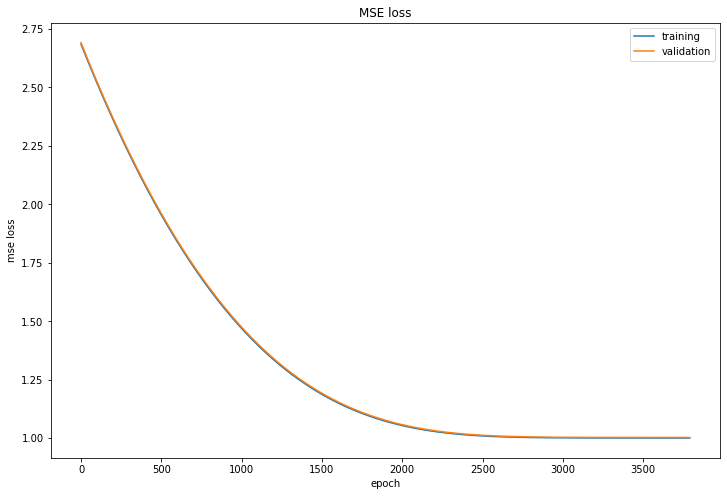

In [13]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('epoch')
plt.ylabel('mse loss')
plt.legend()
plt.title('MSE loss')

In [14]:
predictions = model.predict(test_input)

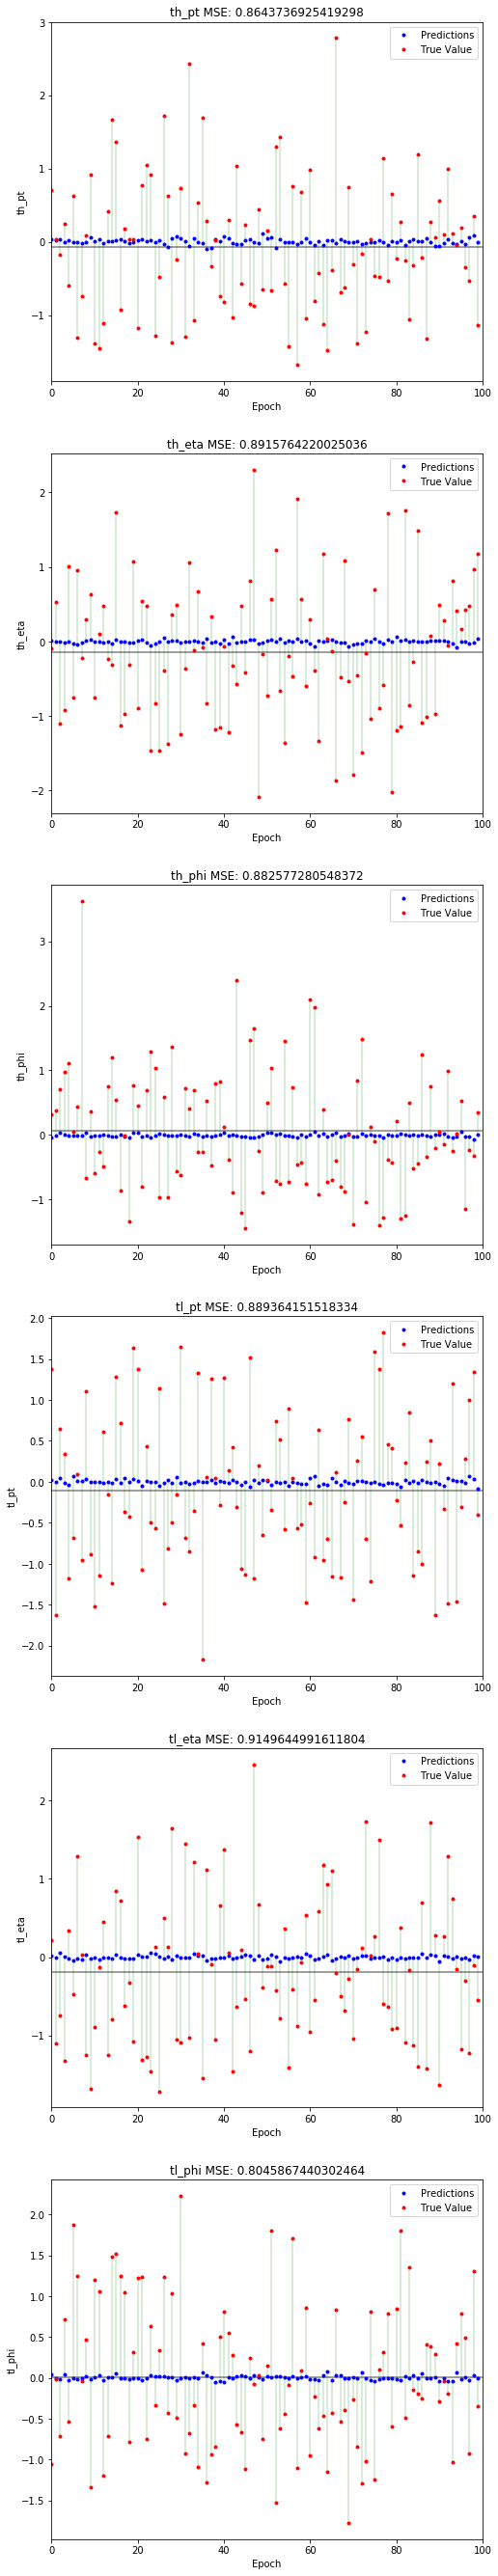

In [15]:
# Training 
crop = 100 

train_small = model.predict(train_input[0:100,:])
output_small = train_output[0:100,:]

def comparison_plot(compare, true):
    plt.figure(figsize=(8,8*output_length))
    for i in range(0,output_length):
        plt.subplot(output_length,1,i+1)
        plt.plot(range(0,crop), compare[:,i], 'bo', markersize=3, label = 'Predictions')
        plt.plot(range(0,crop), true[:,i], 'ro', markersize=3, label = 'True Value')
        ym, yM = plt.ylim()
        for x in range(100):
            plt.vlines(x, color='g', linestyle='-', alpha=0.2, ymin= 
                        min(compare[x,i], true[x,i]), 
                        ymax= max(compare[x,i], true[x,i]))
        plt.hlines(np.mean(true[:,i]), xmin=-20, xmax=crop+20, alpha=0.5)
        MSE = 1/compare[:,i].size*np.sum((compare[:,i]- true[:,i])**2)
        plt.xlabel('Epoch')
        plt.ylabel(output_keys[i])
        plt.xlim(0, crop)
        plt.title(output_keys[i] + " MSE: " + str(MSE))
        plt.legend()

comparison_plot(train_small, output_small)

In [16]:
# Predictions

predictions_small = predictions[0:crop,:]
test_output_small = test_output[0:crop,:]

MSE = 1/predictions.size*np.sum((predictions- test_output)**2)
print("total MSE: " + str(MSE))

for i in range(output_length):
    MSE = 1/predictions[:,i].size*np.sum((predictions[:,i] -test_output[:,i])**2)
    print("{0} MSE : ".format(output_keys[i]), '%.10f'%MSE)

total MSE: 0.9938897818056875
th_pt MSE :  1.0016564524
th_eta MSE :  0.9844129313
th_phi MSE :  0.9792123954
tl_pt MSE :  0.9985821430
tl_eta MSE :  0.9940091817
tl_phi MSE :  1.0054655872


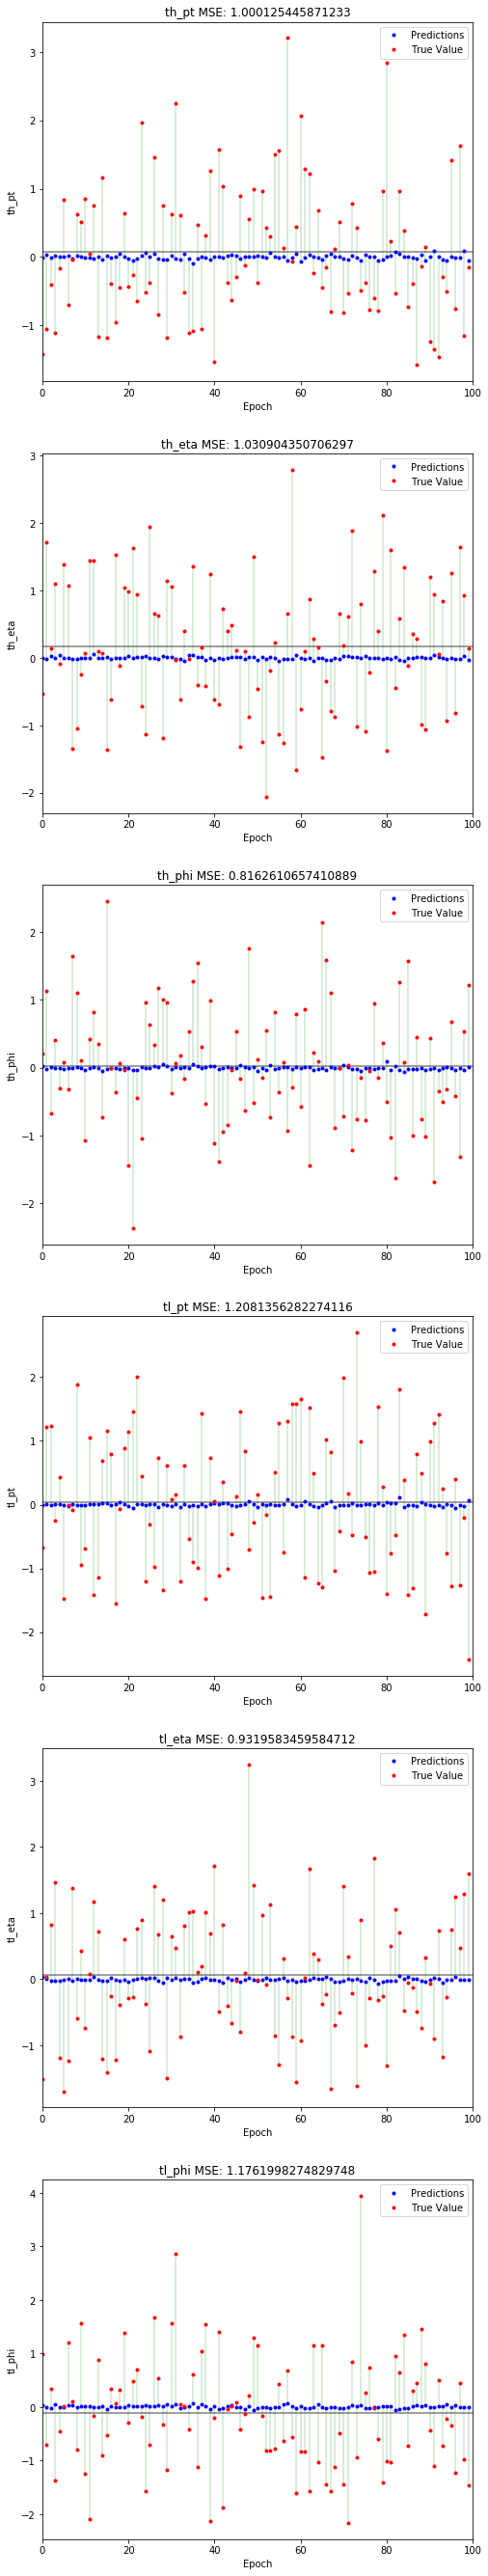

In [17]:
comparison_plot(predictions_small, test_output_small)

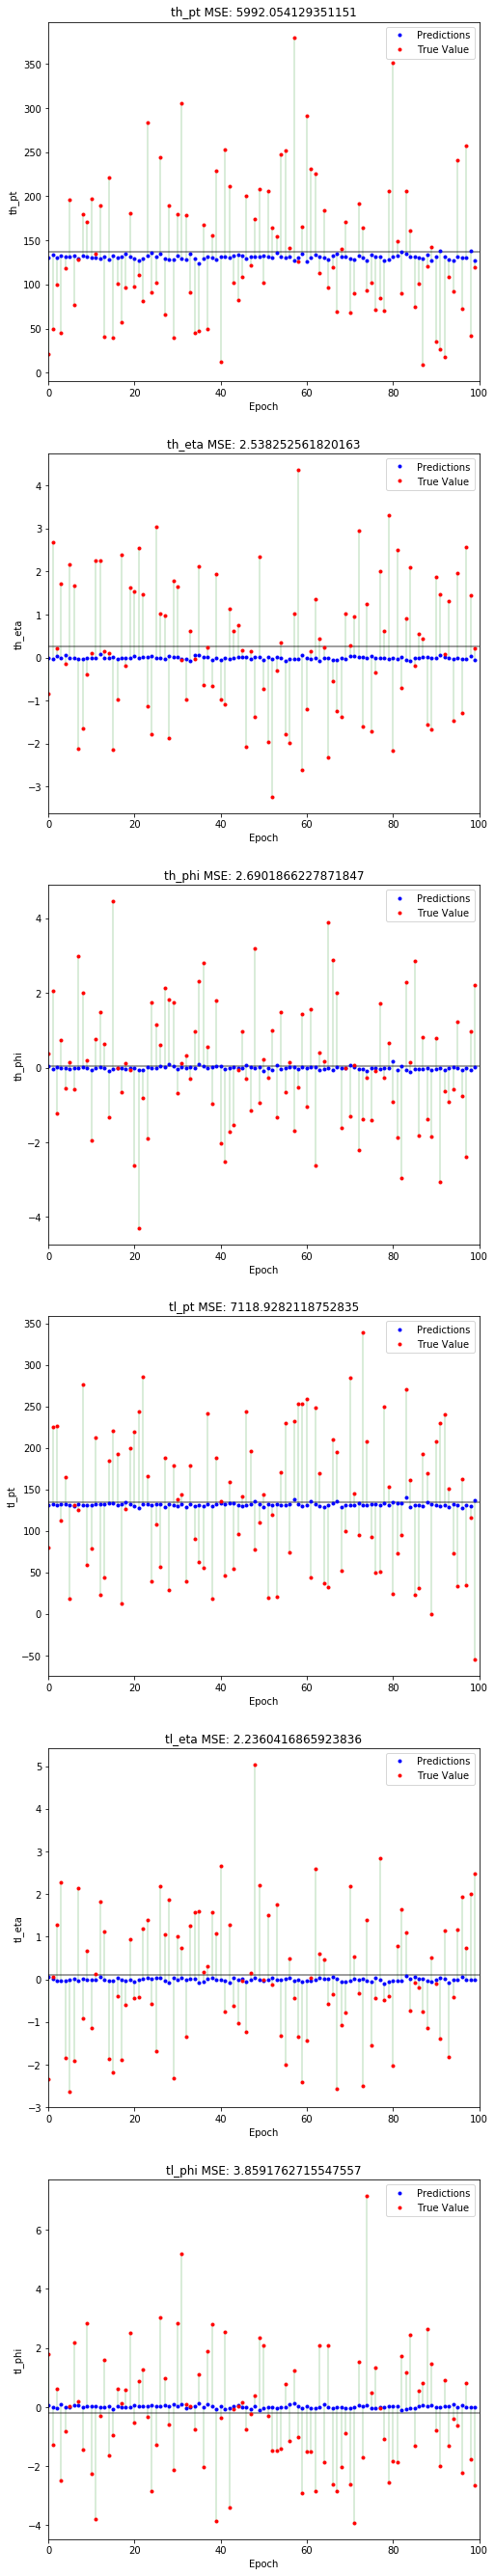

In [18]:
# Back to original units 

scaled_predictions = predictions*out_std + out_mean
scaled_output = test_output*out_std + out_mean

comparison_plot(scaled_predictions[0:crop,:], scaled_output[0:crop,:])


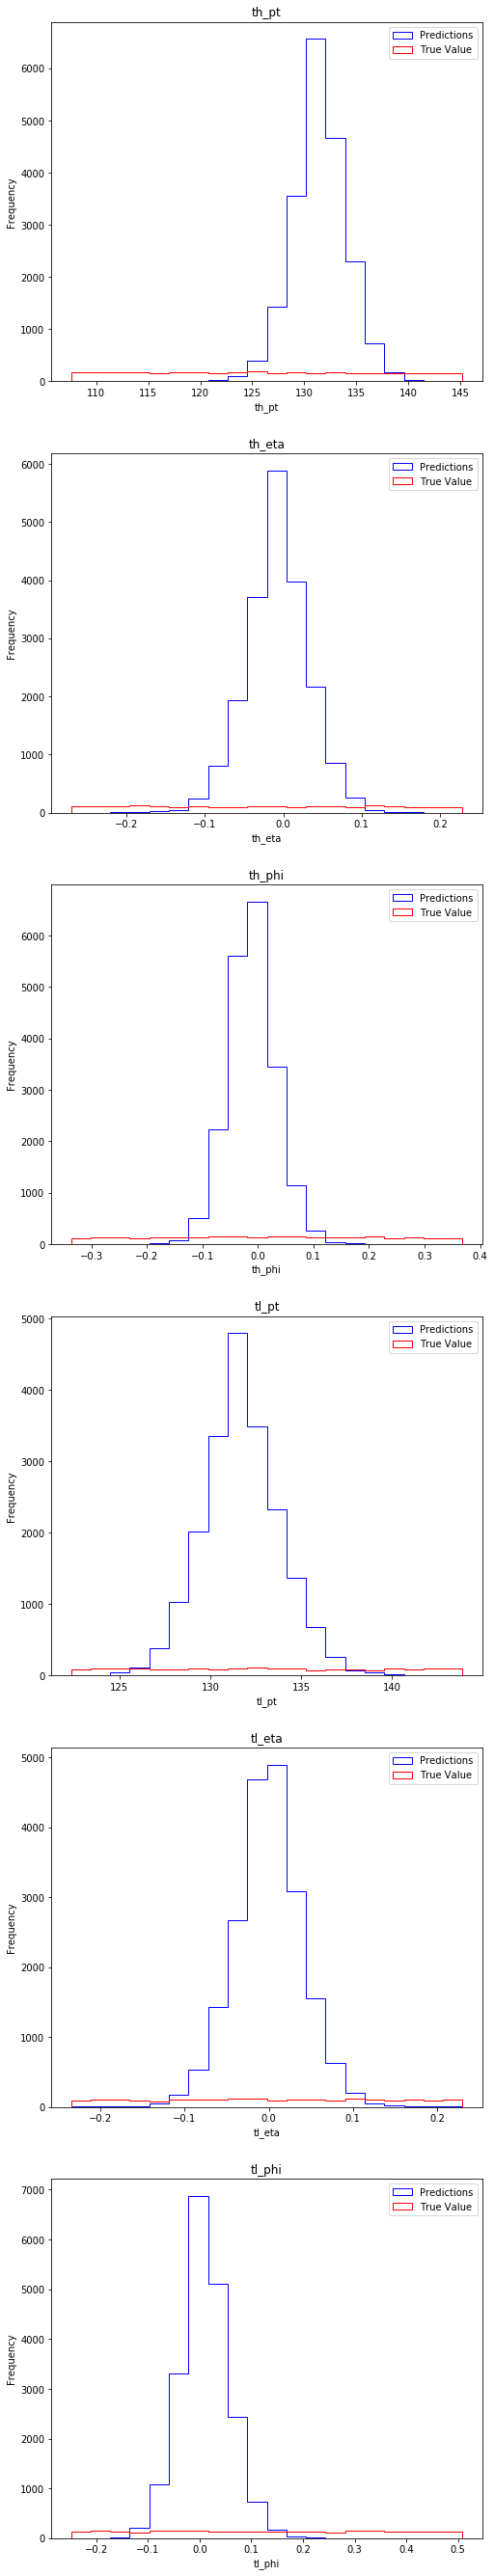

In [19]:
# Histograms 

def histograms(compare, true):
    plt.figure(figsize=(8,8*output_length))
    for i in range(0, output_length):
        plt.subplot(output_length,1,i+1)
        histo, bin_edges = np.histogram(compare[:,i],20)
        plt.hist(compare[:,i], bin_edges, histtype = 'step', color='b', label='Predictions')
        plt.hist(true[:,i], bin_edges, histtype = 'step', color='r', label='True Value')
        plt.xlabel(output_keys[i])
        plt.ylabel('Frequency')
        plt.title(output_keys[i])
        plt.legend()

histograms(scaled_predictions, scaled_output)